# Task 2: Credit Risk Prediction
# Dataset: Loan Prediction Dataset

#  Import Libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset

In [60]:
data = pd.read_csv('loan_prediction.csv')  # replace with your path
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#  Inspect Dataset

In [61]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIn


#  Handle Missing Values

In [63]:
categorical_cols = ['Gender','Married','Dependents','Self_Employed','Credit_History','Property_Area']
for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0])

numeric_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for col in numeric_cols:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].median())

#  Fix Dependents Column

In [64]:
if 'Dependents' in data.columns:
    data['Dependents'] = data['Dependents'].replace('3+', 3).astype(float)

#  Create Target Column

In [65]:
if 'Loan_Status' not in data.columns:
    data['Loan_Status'] = data['Credit_History'] 

#  Encode Categorical Variables

In [66]:
label_cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

#  Exploratory Data Analysis

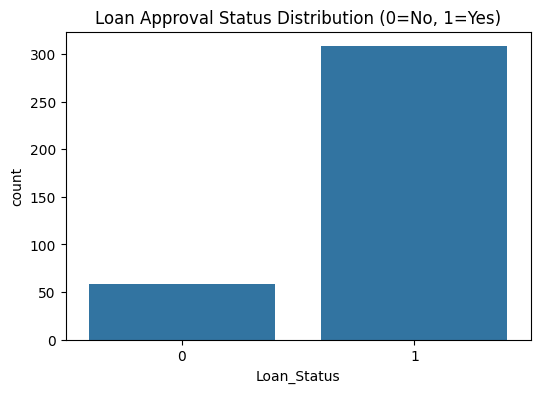

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Approval Status Distribution (0=No, 1=Yes)')
plt.show()

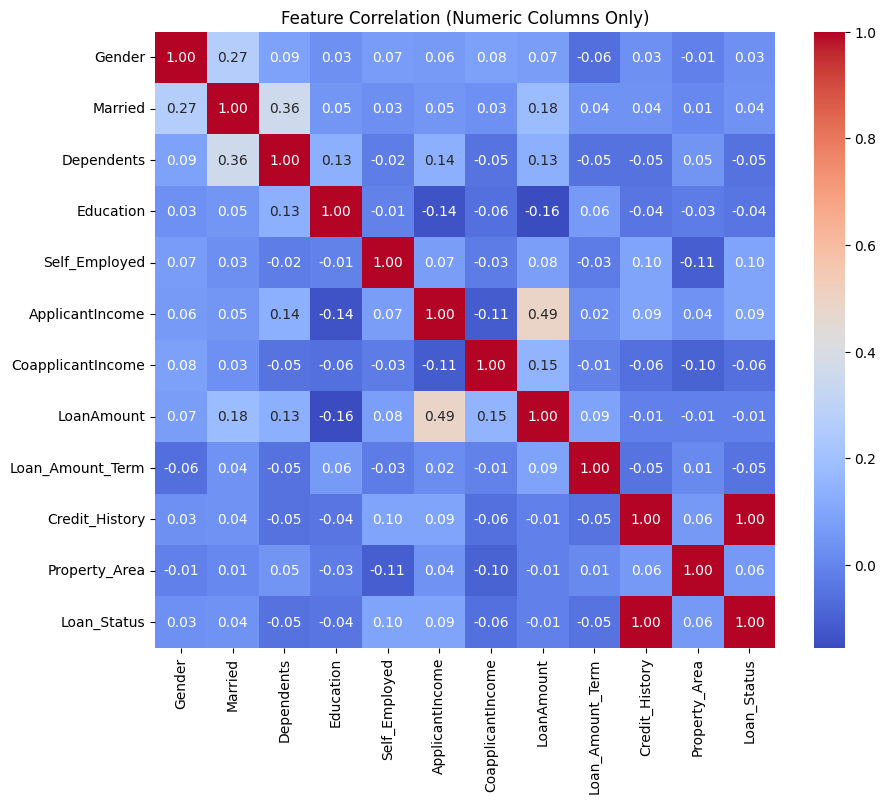

In [68]:
numeric_data = data.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation (Numeric Columns Only)')
plt.show()

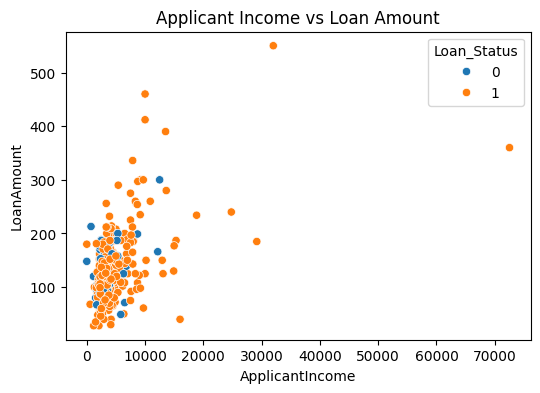

In [69]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=data)
plt.title('Applicant Income vs Loan Amount')
plt.show()

#  Split Features and Target

In [70]:
X = data.drop(['Loan_Status','Loan_ID'], axis=1)
y = data['Loan_Status']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Models

In [71]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#  Evaluate Models

Logistic Regression Performance:
Accuracy: 1.00


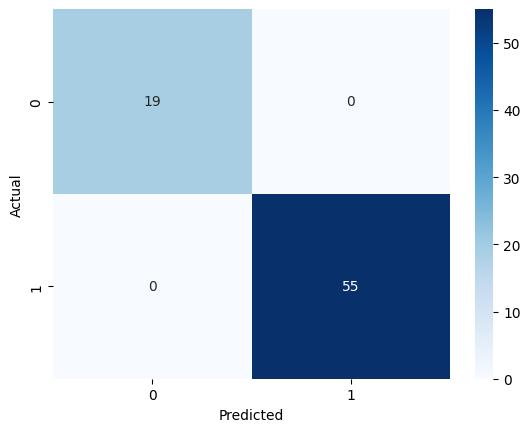

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        55

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74

Decision Tree Performance:
Accuracy: 1.00


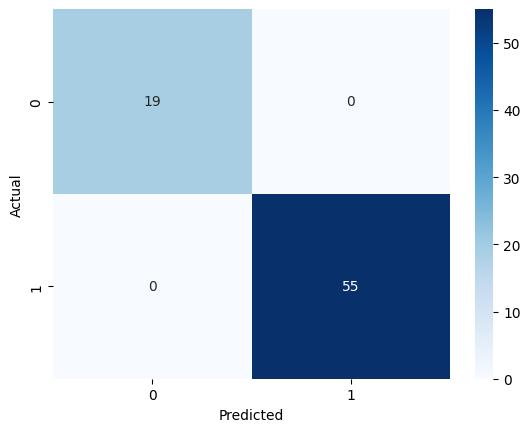

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        55

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [72]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(classification_report(y_test, y_pred))

print("Logistic Regression Performance:")
evaluate_model(log_model, X_test, y_test)

print("Decision Tree Performance:")
evaluate_model(tree_model, X_test, y_test)

#  Key Insights
- Credit_History is the strongest predictor of loan approval.
- ApplicantIncome has a positive but small effect on approval.
- Decision Tree can handle non-linear patterns better than Logistic Regression.
- Banks can focus on borderline applicants for manual review to reduce risk.